# Data Cleaning

In [26]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/Data Analysis Task List/Data Set For Task/1) iris.csv"
df = pd.read_csv(csv_path)
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.capitalize()
print(df.shape)
print(f"Duplicates: {df.duplicated().sum()}")
print(df.isna().sum())
print(df.info())
print(df.describe())
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(147, 5)
Duplicates: 0
Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  147 non-null    float64
 1   Sepal_width   147 non-null    float64
 2   Petal_length  147 non-null    float64
 3   Petal_width   147 non-null    float64
 4   Species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None
       Sepal_length  Sepal_width  Petal_length  Petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000  

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Boxplot and scatterplot showing correlation between attributes

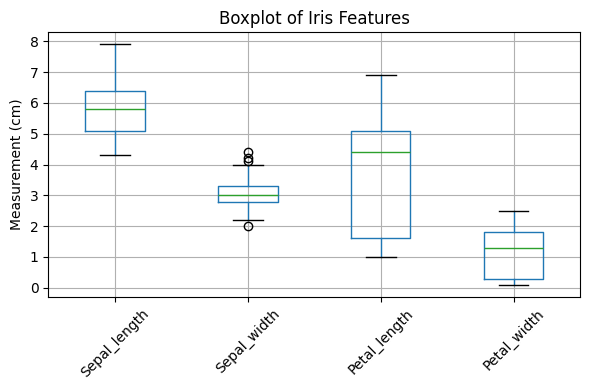

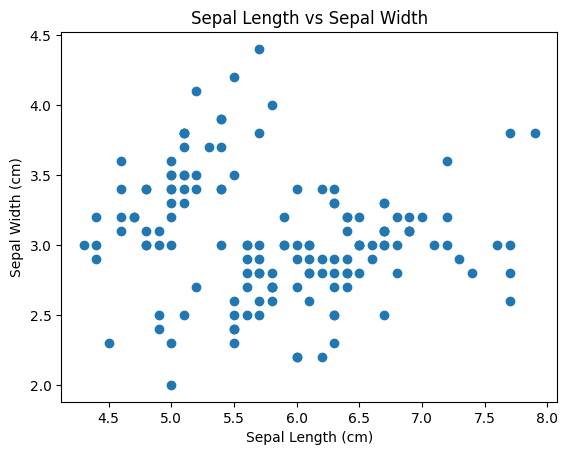

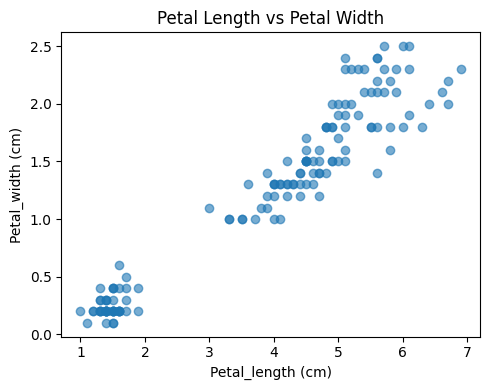

              Sepal_length  Sepal_width  Petal_length  Petal_width
Sepal_length      1.000000    -0.109321      0.871305     0.817058
Sepal_width      -0.109321     1.000000     -0.421057    -0.356376
Petal_length      0.871305    -0.421057      1.000000     0.961883
Petal_width       0.817058    -0.356376      0.961883     1.000000


In [27]:
numeric_cols = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

plt.figure(figsize=(6,4))
df[numeric_cols].boxplot()
plt.title('Boxplot of Iris Features')
plt.ylabel('Measurement (cm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Boxplot of iris features.jpg")
plt.show()

plt.figure()
plt.scatter(df['Sepal_length'], df['Sepal_width'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.savefig("scatter plot between sepal_length and sepal width.jpg")
plt.show()


plt.figure(figsize=(5,4))
plt.scatter(df['Petal_length'], df['Petal_width'], alpha=0.6)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal_length (cm)')
plt.ylabel('Petal_width (cm)')
plt.tight_layout()
plt.savefig("scatter plot between petal_length and petal width.jpg")
plt.show()

corr = df.corr(numeric_only=True)
print(corr)

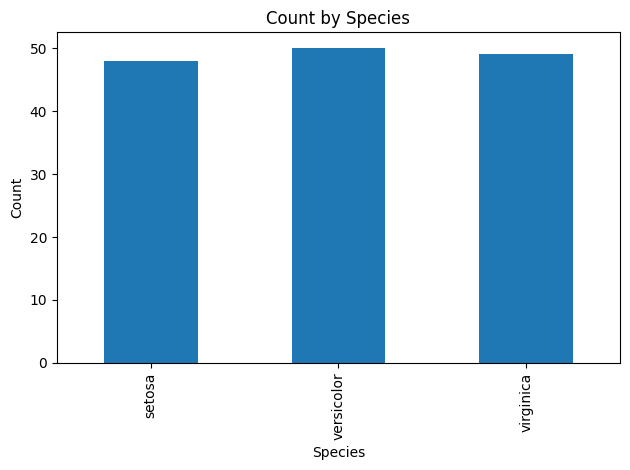

In [28]:
ax = df['Species'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.set_title('Count by Species')
plt.tight_layout()
plt.savefig("bar plot representing count of the 3 types of species.jpg")
plt.show()

# converting species to numeric

In [29]:
from sklearn.preprocessing import LabelEncoder


categorical_features = [
    'Species'
]


label_encoder = LabelEncoder()


for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


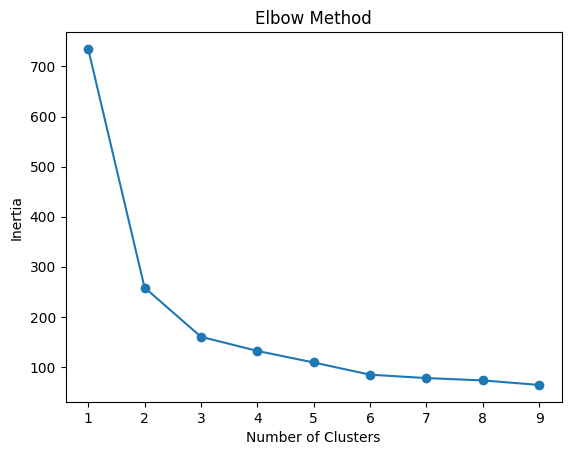

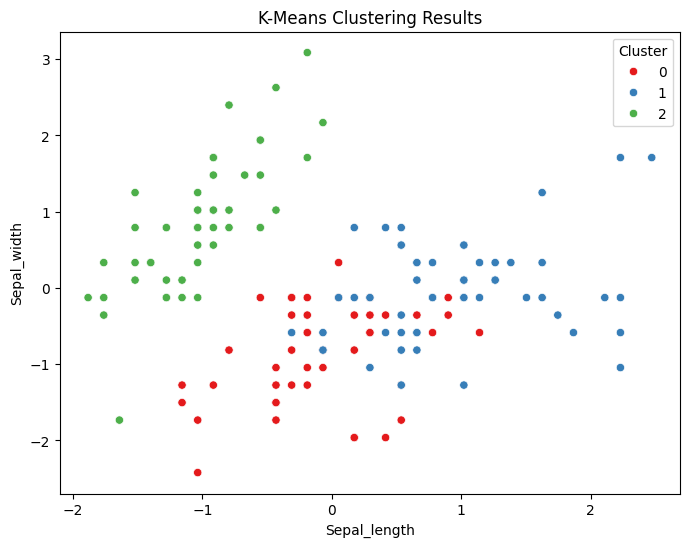

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
features = df[['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width','Species']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title('K-Means Clustering Results')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend(title='Cluster')
plt.savefig("clustering based on species.jpg")
plt.show()



# train and test using decision tree

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
%timeit tree_clf.fit(X_train, y_train)

!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1','2'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)


graph.render('Species')


1.95 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


'Species.pdf'

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [33]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    31.0  38.0  33.0       1.0      102.0         102.0
_______________________________________________
Confusion Matrix: 
 [[31  0  0]
 [ 0 38  0]
 [ 0  0 33]]

Test Result:
Accuracy Score: 95.56%
_______________________________________________
CLASSIFICATION REPORT:
              0          1        2  accuracy  macro avg  weighted avg
precision   1.0   0.916667   0.9375  0.955556   0.951389      0.955556
recall      1.0   0.916667   0.9375  0.955556   0.951389      0.955556
f1-score    1.0   0.916667   0.9375  0.955556   0.951389      0.955556
support    17.0  12.000000  16.0000  0.955556  45.000000     45.000000
________

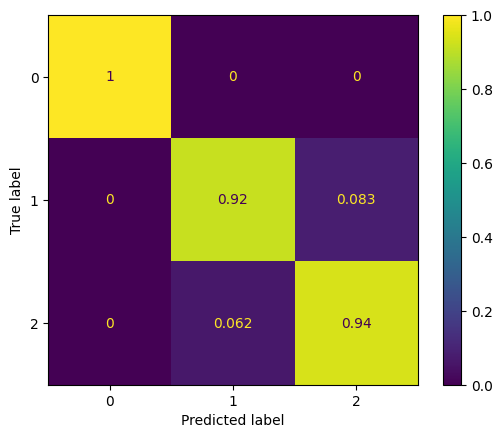

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Decision tree classifier confusion matrix(species).jpg")

In [35]:
from sklearn.metrics import precision_score, recall_score,f1_score

pred = tree_clf.predict(X_test)

print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1_score: ',f1_score(y_test,pred,average='micro'))

Precision:  0.9555555555555556
Recall:  0.9555555555555556
F1_score:  0.9555555555555556


# Train and test using logistic regression

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(solver='liblinear', random_state=42)

log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    37.0  40.0  40.0       1.0      117.0         117.0
_______________________________________________
Confusion Matrix: 
 [[37  0  0]
 [ 0 40  0]
 [ 0  0 40]]

Test Result:
Accuracy Score: 93.33%
_______________________________________________
CLASSIFICATION REPORT:
              0     1         2  accuracy  macro avg  weighted avg
precision   1.0   0.9  0.888889  0.933333    0.92963      0.933333
recall      1.0   0.9  0.888889  0.933333    0.92963      0.933333
f1-score    1.0   0.9  0.888889  0.933333    0.92963      0.933333
support    11.0  10.0  9.000000  0.933333   30.00000     30.000000
____________________________

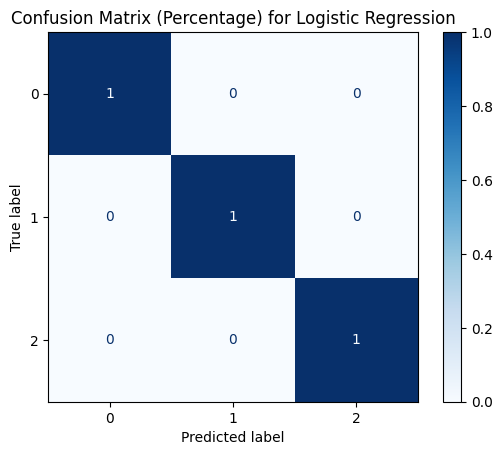

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

log_reg_pred = log_reg.predict(X_test)


cm = confusion_matrix(y_test, log_reg_pred, labels=log_reg.classes_, normalize='true')


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Percentage) for Logistic Regression')
plt.grid(False)
plt.savefig("logistic regression confusion matrix(species).jpg")
plt.show()

In [40]:

print('Precision:', precision_score(y_test, log_reg_pred,average='micro'))
print('=======================================')
print('Recall:', recall_score(y_test, log_reg_pred,average='micro'))
print('=======================================')
print('F1 Score:', f1_score(y_test, log_reg_pred,average='micro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
